The aim of the problem is to predict whether an applicant will default on the Home loan payment or not. This prediction can be extremely useful for any loan disbursing financial services organization. For each ID in the Test Dataset, one should predict the “Default” level. 

DATA DESCRIPTION:

ID  - ID of the Applicant

Loan Limit - Whether the loan limit exceeds the PSE(Public sector Enterprise) conforming limit
              
  cf-Conforming
                
  ncf-Non Conforming

Gender  -  Gender of the Applicant

approv_in_adv - Whether application involved a request for pre approval of the loan
                    
 nopre-pre approval not requested
                    
 pre-pre approval requested

Loan_type - Type of loan the application comes under
                
 type1-Home Loan
 type2-Commercial Purchase
 type3-Lease Rental Discounting
                
Loan_Purpose - Purpose of the loan
  p1- Home Purchase
                   
  p2-Others
                   
  p3-Cash-out refinancing
                   
  p4-Refinancing
                       
Credit_Worthiness - Credit worthiness or Lien is a claim or legal right against assets that are used as collateral for a debt.,Lien status of the property 
  
  securing covered loan
  
  l1-Secured by first lien
  
  l2-Secured by second lien


Open credit - Open-end credit is a preapproved loan that a bank or financial institution lends to a borrower.
    
   opc-Open end credit
    
   nopc-Not Open end credit

Business or Commercial - b/c- For Business or commercial
                         nob/c- Not for Business or Commercial
              
Loan_amount - Amount applied for
    
   Rate_of_interest - Interest on the amount
    
   Interest rate spread - Interest rate spread is the difference between the average yield a 
                           financial institution receives from loans and the average rate it 
                           pays on deposits and borrowings

Upfront Charges - Its the fee charged by a lender to process a new loan application
    
Term  - Tenure of the loan
    
Neg_ammortization - Negative amortization is an increase in the principal balance of a 
                    loan caused by a failure to cover the interest due on that loan.
                  
  neg_amm-Negative Amortization 
                  
  not_neg-Not Negative

Interest_only - Whether application terms include interest only payments
                    
   int_only-Interest only payment
                    
   not_int-No interest only payment
   
   
Lump_sum_payment - Lump sum payment or Balloon payment is a payment which is attached to a loan, usually made towards the end 
of the loan period.

lpsm-Lumpsum Payment

not_lpsm-No Lumpsum Payment


Property Value  - Value of the property securing the covered loan.

Construction_type - Type of Construction of the home or property
 
 sb- Site Built

 mh-Manufactured Home
 
 Occupancy Type - Kind of residence 
  
  pr-Primary Residence
  
  sr-Second Residence
  
  ir-Investment Property
  
  
Secured by - Loan secured by
 Land
 
 Home
 
Total units - Number of dwelling units(rooms) related to the property covering the loan

1U, 2U, 3U, 4U

Income  - Income of the applicant

dtir - Debt to income Ratio

Credit type - The type of the credit scoring model used

 CIB- CIBIL

 EXP-Experian

 EQUI-Equifax

 CRIF-CRIF

Credit_score  - The credit score of the applicant

Co-applicant_credit_type - The type of the credit scoring model used
 
 CIB-CIBIL
 
 EXP-Experian
age -  Age of the applicant

Submission of the application - Type of submission of application

   to_inst-Submitted directly to the institution

   not_inst-Not submitted directly
   
   NA

LTV - Loan to value ratio of the property covering the loan in percentage

Region - Applicant region 

Security Type - Property securing the loan 

 Indirect

 Direct

year  - Application year


Status - Loan status

   1-Defaulted

   0-Not Defaulted


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('train_data.csv')
df1.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
df2 = pd.read_csv('test_data.csv')
df2.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,173560,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,9480.0,EXP,502,CIB,55-64,not_inst,86.525974,North,direct,18.0
1,173561,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,1620.0,EXP,526,CIB,55-64,to_inst,61.968085,south,direct,38.0
2,173562,2019,cf,Joint,nopre,type2,p1,l1,nopc,b/c,...,3240.0,CRIF,827,EXP,<25,to_inst,94.471154,North,direct,59.0
3,173563,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,2100.0,EXP,591,CIB,55-64,to_inst,91.015625,North,direct,42.0
4,173564,2019,cf,Joint,nopre,type2,p3,l1,nopc,b/c,...,6180.0,EXP,598,EXP,35-44,to_inst,96.383648,North,direct,47.0


In [4]:
df1.shape

(148670, 34)

In [5]:
df2.shape

(63717, 33)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63717 entries, 0 to 63716
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         63717 non-null  int64  
 1   year                       63717 non-null  int64  
 2   loan_limit                 62293 non-null  object 
 3   Gender                     63717 non-null  object 
 4   approv_in_adv              63301 non-null  object 
 5   loan_type                  63717 non-null  object 
 6   loan_purpose               63659 non-null  object 
 7   Credit_Worthiness          63717 non-null  object 
 8   open_credit                63717 non-null  object 
 9   business_or_commercial     63717 non-null  object 
 10  loan_amount                63717 non-null  int64  
 11  rate_of_interest           48144 non-null  float64
 12  Interest_rate_spread       48055 non-null  float64
 13  Upfront_charges            46750 non-null  flo

In [8]:
df1.isnull().sum().any

<bound method NDFrame._add_numeric_operations.<locals>.any of ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type    

In [9]:
df2.isnull().sum().any

<bound method NDFrame._add_numeric_operations.<locals>.any of ID                               0
year                             0
loan_limit                    1424
Gender                           0
approv_in_adv                  416
loan_type                        0
loan_purpose                    58
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             15573
Interest_rate_spread         15662
Upfront_charges              16967
term                            14
Neg_ammortization               38
interest_only                    0
lump_sum_payment                 0
property_value                6324
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        3889
credit_type                      0
Credit_Score                     0
co-applicant_credit_type    

In [10]:
df1.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [11]:
df1.dtypes.value_counts()

object     21
float64     8
int64       5
dtype: int64

In [12]:
df2.dtypes.value_counts()

object     21
float64     8
int64       4
dtype: int64

In [13]:
# Statistical information about numerical features
num_stat = df1.describe().T
print(num_stat['min'].mean(), num_stat['max'].mean(), num_stat['25%'].mean(),
      num_stat['75%'].mean())
num_stat.head(10).T

4000.563806015231 1608294.0466923078 41071.68583541077 93656.89112388693


,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000


In [14]:
num_stat.index[num_stat['count'] == 0].tolist()

[]

In [15]:
# Check columns with missing values

num_stat.index[(df1.shape[0] - num_stat['count']) > 0].tolist()

['rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'LTV',
 'dtir1']

In [16]:
num_stat_2 = df2.describe().T
print(num_stat_2['min'].mean(), num_stat_2['max'].mean(), num_stat_2['25%'].mean(),
      num_stat_2['75%'].mean())
num_stat_2.head(10).T

16723.2225194475 1520828.1351083333 55111.0925972225 108536.63207587751


,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score
count,63717.000000,63717.0,6.371700e+04,48144.000000,48055.000000,46750.000000,63703.000000,5.739300e+04,59828.000000,63717.000000
mean,205418.000000,2019.0,3.319441e+05,4.043791,0.439476,3183.159632,335.293471,5.011452e+05,6910.610417,700.658867
std,18393.657888,0.0,1.860108e+05,0.560663,0.513580,3212.922148,58.408498,3.705137e+05,5744.295093,116.085091
min,173560.000000,2019.0,1.650000e+04,0.000000,-3.688000,0.000000,96.000000,8.000000e+03,0.000000,500.000000
25%,189489.000000,2019.0,1.965000e+05,3.625000,0.069500,550.000000,360.000000,2.680000e+05,3720.000000,600.000000
50%,205418.000000,2019.0,2.965000e+05,3.990000,0.386300,2541.430000,360.000000,4.180000e+05,5700.000000,700.000000
75%,221347.000000,2019.0,4.365000e+05,4.375000,0.775700,4756.250000,360.000000,6.280000e+05,8520.000000,801.000000
max,237276.000000,2019.0,3.566500e+06,7.875000,2.986300,33469.510000,360.000000,1.415800e+07,242760.000000,900.000000


In [17]:
num_stat_2.index[num_stat_2['count'] == 0].tolist()

[]

In [18]:
num_stat_2.index[(df2.shape[0] - num_stat_2['count']) > 0].tolist()

['rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'LTV',
 'dtir1']

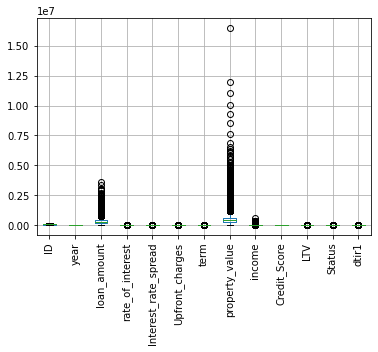

In [19]:
df1.boxplot()
plt.xticks(rotation=90)
plt.show()

From the boxplot we can observe that there are outliers in Property value and loan amount 
might affect the prediction of target columns which is exited.

{'whiskers': [<matplotlib.lines.Line2D at 0x1b58e5ee190>,
 'caps': [<matplotlib.lines.Line2D at 0x1b58e5ee850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b590c6adf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b58e5eef10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b58e5b02b0>],
 'means': []}

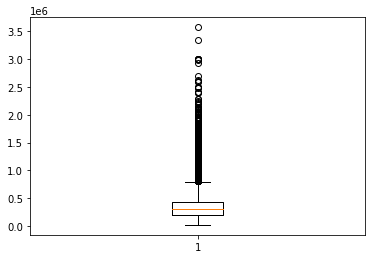

In [20]:
plt.boxplot(df1['loan_amount'])

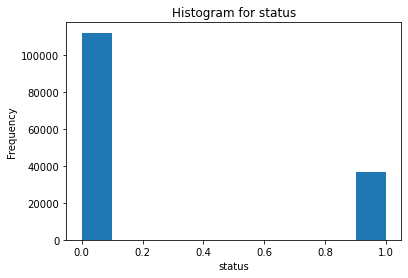

In [21]:
plt.hist(df1["Status"])
plt.xlabel("status")
plt.ylabel("Frequency")
plt.title("Histogram for status")
plt.show()

From above plot we can observe that the target variable Status is not evenly distributed. As the count for 0 class is much more than class 1.

In [22]:
# Creating Dummies
df_categ= df1.select_dtypes(exclude="number")
#df_categ.drop("Status",axis=1,inplace= True)
df_dummy= pd.get_dummies(df_categ,drop_first= True).reset_index(drop=True)


In [23]:
df_dummy.columns

Index(['loan_limit_ncf', 'Gender_Joint', 'Gender_Male',
       'Gender_Sex Not Available', 'approv_in_adv_pre', 'loan_type_type2',
       'loan_type_type3', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'Credit_Worthiness_l2', 'open_credit_opc',
       'business_or_commercial_nob/c', 'Neg_ammortization_not_neg',
       'interest_only_not_int', 'lump_sum_payment_not_lpsm',
       'construction_type_sb', 'occupancy_type_pr', 'occupancy_type_sr',
       'Secured_by_land', 'total_units_2U', 'total_units_3U', 'total_units_4U',
       'credit_type_CRIF', 'credit_type_EQUI', 'credit_type_EXP',
       'co-applicant_credit_type_EXP', 'age_35-44', 'age_45-54', 'age_55-64',
       'age_65-74', 'age_<25', 'age_>74', 'submission_of_application_to_inst',
       'Region_North-East', 'Region_central', 'Region_south',
       'Security_Type_direct'],
      dtype='object')

In [24]:
# Scaling the Numerical Features:
from sklearn.preprocessing import StandardScaler
df_nume= df1.select_dtypes(include="number")
X_scaler= StandardScaler()
num_scaled= X_scaler.fit_transform(df_nume)
df_num_scaled= pd.DataFrame(num_scaled,columns= df_nume.columns).reset_index(drop=True)
#Status= pd.DataFrame(df1["Status"]).reset_index(drop=True)

In [25]:
df_final= pd.concat([df_num_scaled,df_dummy],axis=1)
df_final.shape

(148670, 51)

In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 51 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 148670 non-null  float64
 1   year                               148670 non-null  float64
 2   loan_amount                        148670 non-null  float64
 3   rate_of_interest                   112231 non-null  float64
 4   Interest_rate_spread               112031 non-null  float64
 5   Upfront_charges                    109028 non-null  float64
 6   term                               148629 non-null  float64
 7   property_value                     133572 non-null  float64
 8   income                             139520 non-null  float64
 9   Credit_Score                       148670 non-null  float64
 10  LTV                                133572 non-null  float64
 11  Status                             1486

<AxesSubplot:xlabel='Gender', ylabel='Status'>

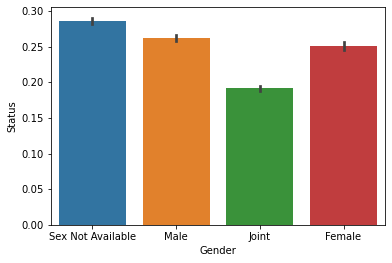

In [27]:
sns.barplot(x= df1["Gender"],y= df1["Status"])

In [28]:
df2.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'dtir1'],
      dtype='object')

<AxesSubplot:xlabel='loan_type', ylabel='Status'>

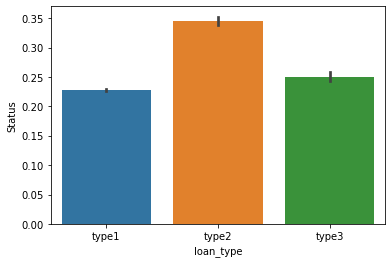

In [29]:
sns.barplot(x= df1["loan_type"],y= df1["Status"])


<AxesSubplot:xlabel='loan_purpose', ylabel='Status'>

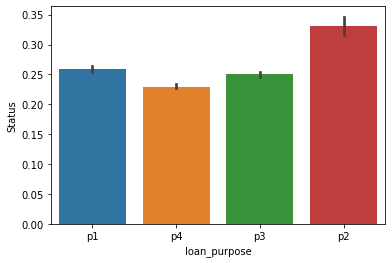

In [30]:
sns.barplot(x= df1["loan_purpose"],y= df1["Status"])


In [31]:
pd.crosstab(df1["Status"],df1["Gender"])

Gender,Female,Joint,Male,Sex Not Available
Status,,,,
0,20418,33466,31255,26892
1,6848,7933,11091,10767


In [32]:
from statsmodels.stats.proportion import proportions_ztest
x= np.array([11091,6848])
n= np.array([31255,20418])
m = np.array([7933,10767])
o = np.array([33466,26892])
proportions_ztest(x,n)

(4.543776008839991, 5.5255372631523525e-06)

In [33]:
proportions_ztest(m,o)

(-43.13046220297743, 0.0)

Proportion of males is not same as Proportion of females. Thus we can conclude that Gender is the significant feature in predicting the Target Column.

In [34]:
df_final.head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,...,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,-1.732039,0.0,-1.166980,NaN,NaN,NaN,0.425679,-1.055453,-0.803092,0.502357,...,0,0,0,0,0,1,0,0,1,1
1,-1.732016,0.0,-0.677607,NaN,NaN,NaN,0.425679,NaN,-0.304367,-1.275413,...,0,1,0,0,0,1,0,0,0,1
2,-1.731993,0.0,0.409890,0.916520,-0.471027,-0.808954,0.425679,0.028079,0.388307,1.158234,...,0,0,0,0,0,1,0,0,1,1
3,-1.731969,0.0,0.681764,0.364318,0.466521,NaN,0.425679,0.444822,0.757733,-0.973365,...,1,0,0,0,0,0,0,0,0,1
4,-1.731946,0.0,1.986759,-0.081006,-0.267924,-0.991969,0.425679,0.722651,0.536077,-0.843916,...,0,0,0,0,0,0,0,0,0,1


In [35]:
df_final['rate_of_interest'] = df_final['rate_of_interest'].replace(np.nan, 0)

In [36]:
df_final['Interest_rate_spread'] = df_final['Interest_rate_spread'].replace(np.nan, 0)
df_final['Upfront_charges'] = df_final['Upfront_charges'].replace(np.nan, 0)
df_final['property_value'] = df_final['property_value'].replace(np.nan, 0)

In [37]:
df_final['term'] = df_final['term'].replace(np.nan, 0)
df_final['income'] = df_final['income'].replace(np.nan, 0)

In [38]:
df_final['LTV'] = df_final['LTV'].replace(np.nan, 0)

In [39]:
df_final['dtir1'] = df_final['dtir1'].replace(np.nan, 0)

In [40]:
df_final.head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,...,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,-1.732039,0.0,-1.166980,0.000000,0.000000,0.000000,0.425679,-1.055453,-0.803092,0.502357,...,0,0,0,0,0,1,0,0,1,1
1,-1.732016,0.0,-0.677607,0.000000,0.000000,0.000000,0.425679,0.000000,-0.304367,-1.275413,...,0,1,0,0,0,1,0,0,0,1
2,-1.731993,0.0,0.409890,0.916520,-0.471027,-0.808954,0.425679,0.028079,0.388307,1.158234,...,0,0,0,0,0,1,0,0,1,1
3,-1.731969,0.0,0.681764,0.364318,0.466521,0.000000,0.425679,0.444822,0.757733,-0.973365,...,1,0,0,0,0,0,0,0,0,1
4,-1.731946,0.0,1.986759,-0.081006,-0.267924,-0.991969,0.425679,0.722651,0.536077,-0.843916,...,0,0,0,0,0,0,0,0,0,1


In [41]:
# Finding out the correlation between the features
corr = df1.corr()
corr.shape

(13, 13)

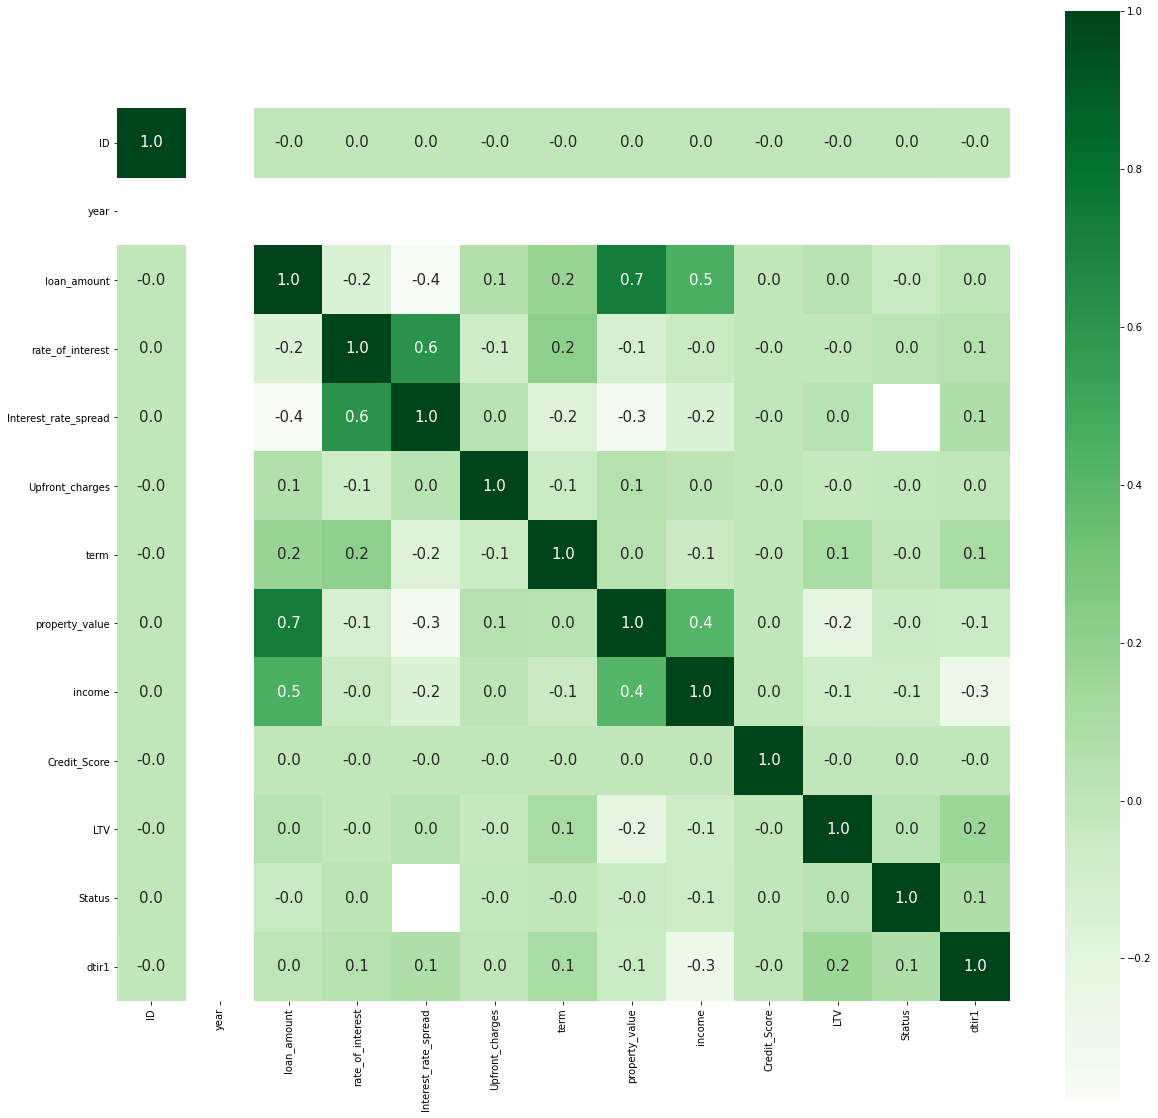

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

In [43]:
df_cat = df1.select_dtypes(include = 'object')
df_cat.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

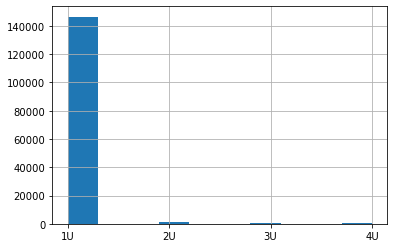

In [44]:
df1['total_units'].hist()
plt.show()

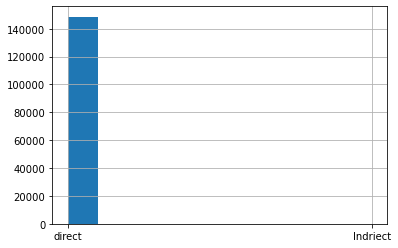

In [45]:
df1['Security_Type'].hist()
plt.show()

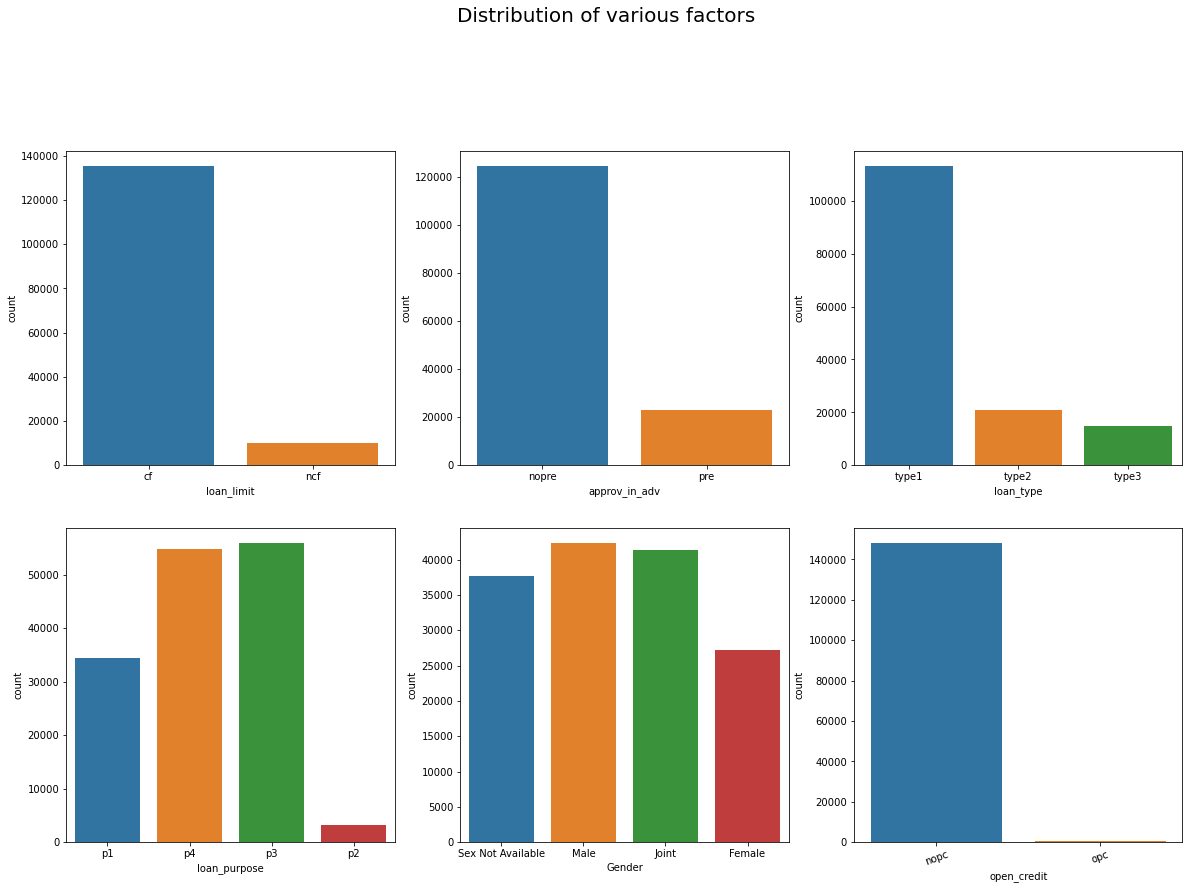

In [46]:
# Plotting countplots for the categorical variables
fig,ax = plt.subplots(2,3, figsize=(20,20))            
plt.suptitle("Distribution of various factors", fontsize=20)
sns.countplot(df_cat['loan_limit'], ax = ax[0,0]) 
sns.countplot(df_cat['approv_in_adv'], ax = ax[0,1]) 
sns.countplot(df_cat['loan_type'], ax = ax[0,2]) 
sns.countplot(df_cat['loan_purpose'], ax = ax[1,0])
sns.countplot(df_cat['Gender'], ax = ax[1,1])  
sns.countplot(df_cat['open_credit'], ax = ax[1,2]) 
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

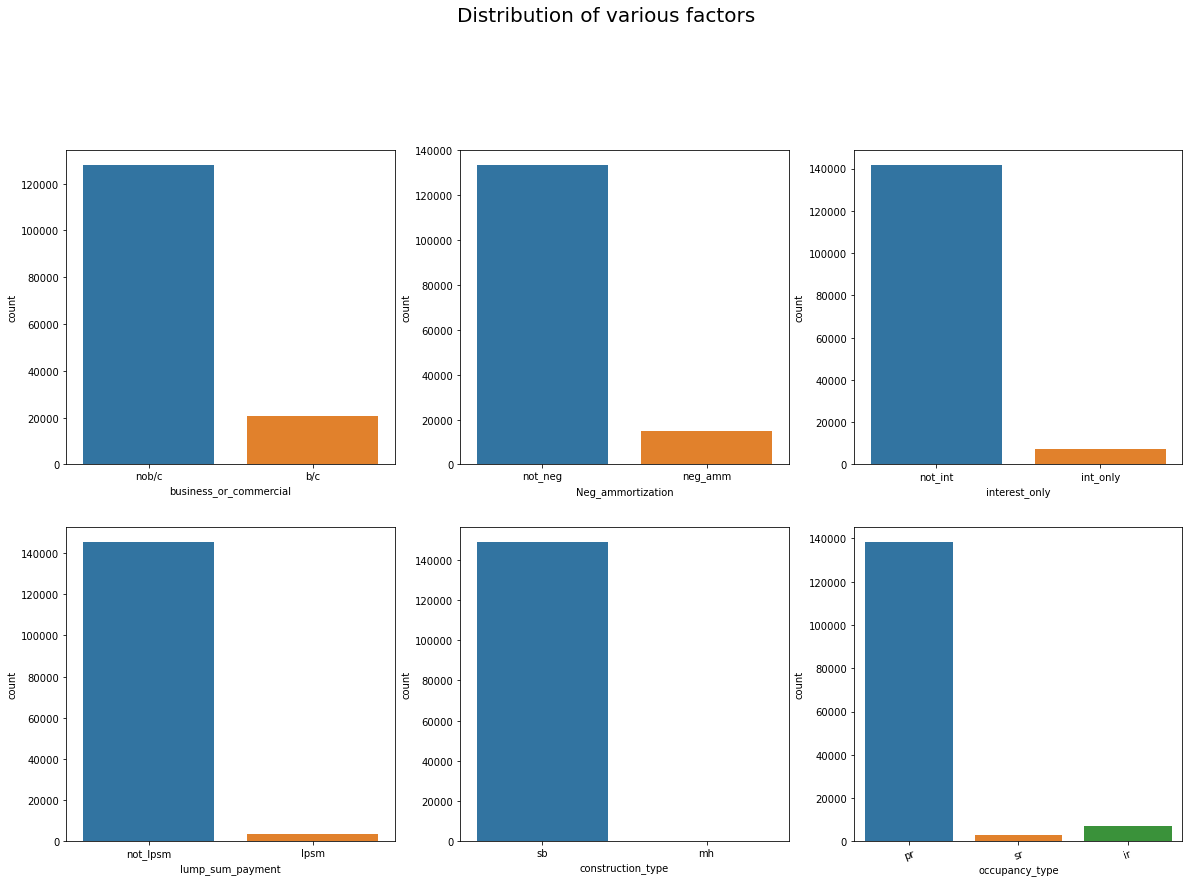

In [47]:
# Plotting countplots for the categorical variables
fig,ax = plt.subplots(2,3, figsize=(20,20))            
plt.suptitle("Distribution of various factors", fontsize=20)
sns.countplot(df_cat['business_or_commercial'], ax = ax[0,0]) 
sns.countplot(df_cat['Neg_ammortization'], ax = ax[0,1]) 
sns.countplot(df_cat['interest_only'], ax = ax[0,2]) 
sns.countplot(df_cat['lump_sum_payment'], ax = ax[1,0])
sns.countplot(df_cat['construction_type'], ax = ax[1,1])  
sns.countplot(df_cat['occupancy_type'], ax = ax[1,2]) 
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

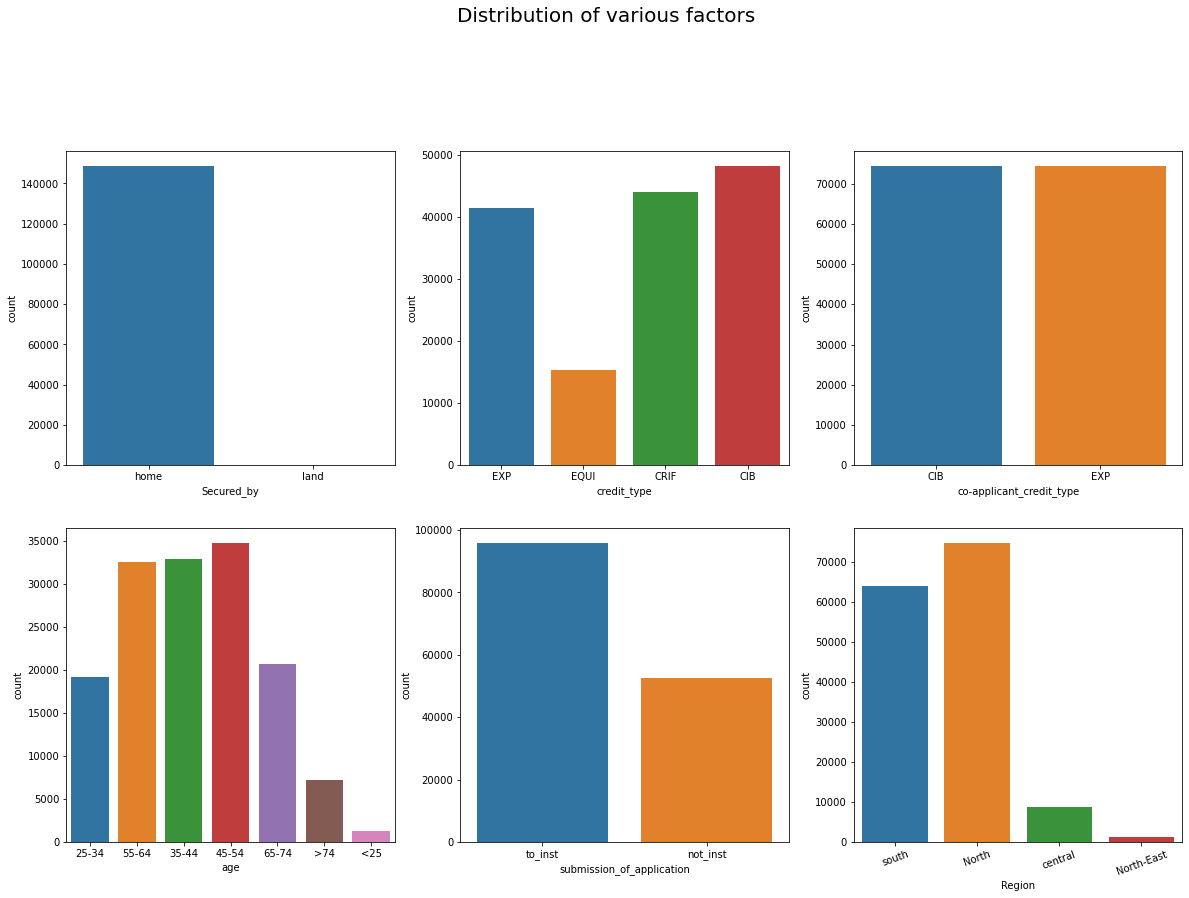

In [48]:
fig,ax = plt.subplots(2,3, figsize=(20,20))            
plt.suptitle("Distribution of various factors", fontsize=20)

sns.countplot(df_cat['Secured_by'], ax = ax[0,0]) 
sns.countplot(df_cat['credit_type'], ax = ax[0,1]) 
sns.countplot(df_cat['co-applicant_credit_type'], ax = ax[0,2]) 
sns.countplot(df_cat['age'], ax = ax[1,0]) 
sns.countplot(df_cat['submission_of_application'], ax = ax[1,1]) 
sns.countplot(df_cat['Region'], ax = ax[1,2]) 
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
X= df_final.drop("Status",axis=1)
Y= df_final["Status"].astype("int")

In [50]:
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,random_state=20,test_size=0.30)

In [51]:

from scipy .stats import ttest_1samp
ttest_1samp(xtrain["property_value"],df_final["property_value"].mean())

Ttest_1sampResult(statistic=1.0358707369175206, pvalue=0.3002648582265009)

In [52]:

from scipy .stats import ttest_1samp
ttest_1samp(xtest["property_value"],df_final["property_value"].mean())

Ttest_1sampResult(statistic=-1.6482100196438962, pvalue=0.09931662515540703)

We can conclude that for both xtrain and xtest pval>0.05 Thus we accept null hypothesis which says that sample represent Population.


In [53]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

In [54]:
LR.fit(xtrain,ytrain)

LogisticRegression()

In [55]:
print("Training Accuracy")
print(LR.score(xtrain,ytrain))
print("Testing Accuracy")
print(LR.score(xtest,ytest))

Training Accuracy
0.8681836089517532
Testing Accuracy
0.8674244972085827


In [56]:
ypred= LR.predict(xtest)

In [57]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[33224   399]
 [ 5514  5464]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     33623
           1       0.93      0.50      0.65     10978

    accuracy                           0.87     44601
   macro avg       0.89      0.74      0.78     44601
weighted avg       0.88      0.87      0.85     44601



In [58]:
#Significant Variables:
coef= list(LR.coef_)
dfc= pd.DataFrame(xtrain.columns,coef)
dfc.rename({0:"Features"},axis=1)

,Features
0.007763,ID
0.000000,year
-0.025562,loan_amount
0.005497,rate_of_interest
-0.453462,Interest_rate_spread
-0.161507,Upfront_charges
-0.068049,term
0.206744,property_value
-0.308634,income
0.008743,Credit_Score


In [59]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(ytest,ypred)

0.5762744068475105

In [60]:
confusion= (confusion_matrix(ytest,ypred))

TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]

print("True Positive:",TP)
print("True Negative:",TN)
print("False Positive:",FP)
print("False Negative:",FN)


Specificity= TN/(TN+FP)
print("Value for Specificity:",Specificity)


FPR= 1- Specificity
print('False Positve Rate:',FPR)

True Positive: 5464
True Negative: 33224
False Positive: 399
False Negative: 5514
Value for Specificity: 0.9881331231597419
False Positve Rate: 0.011866876840258112


In [61]:
from sklearn.ensemble import RandomForestClassifier


In [62]:
df2['rate_of_interest'] = df2['rate_of_interest'].replace(np.nan, 0)

In [63]:
df2['Interest_rate_spread'] = df2['Interest_rate_spread'].replace(np.nan, 0)
df2['Upfront_charges'] = df2['Upfront_charges'].replace(np.nan, 0)
df2['property_value'] = df2['property_value'].replace(np.nan, 0)
df2['term'] = df2['term'].replace(np.nan, 0)
df2['income'] = df2['income'].replace(np.nan, 0)
df2['LTV'] = df2['LTV'].replace(np.nan, 0)
df2['dtir1'] = df2['dtir1'].replace(np.nan, 0)

In [64]:
df1['loan_limit'] = df1['loan_limit'].replace(np.nan, 0)
df1['approv_in_adv'] = df1['approv_in_adv'].replace(np.nan, 0)
df1['loan_purpose'] = df1['loan_purpose'].replace(np.nan, 0)
df1['Neg_ammortization'] = df1['Neg_ammortization'].replace(np.nan, 0)
df1['age'] = df1['age'].replace(np.nan, 0)
df1['submission_of_application'] = df1['submission_of_application'].replace(np.nan, 0)


In [65]:
df1['rate_of_interest'] = df1['rate_of_interest'].replace(np.nan, 0)
df1['Interest_rate_spread'] = df1['Interest_rate_spread'].replace(np.nan, 0)
df1['Upfront_charges'] = df1['Upfront_charges'].replace(np.nan, 0)
df1['property_value'] = df1['property_value'].replace(np.nan, 0)
df1['term'] = df1['term'].replace(np.nan, 0)
df1['income'] = df1['income'].replace(np.nan, 0)
df1['LTV'] = df1['LTV'].replace(np.nan, 0)
df1['dtir1'] = df1['dtir1'].replace(np.nan, 0)

In [66]:
df2['loan_limit'] = df2['loan_limit'].replace(np.nan, 0)
df2['approv_in_adv'] = df2['approv_in_adv'].replace(np.nan, 0)
df2['loan_purpose'] = df2['loan_purpose'].replace(np.nan, 0)
df2['Neg_ammortization'] = df2['Neg_ammortization'].replace(np.nan, 0)
df2['age'] = df2['age'].replace(np.nan, 0)
df2['submission_of_application'] = df2['submission_of_application'].replace(np.nan, 0)


In [67]:
Y_train = df1['Status'].astype("int")
features = ['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
        'dtir1']

In [68]:
X_train = pd.get_dummies(df1[features])
X_test = pd.get_dummies(df2[features])
model = RandomForestClassifier(n_estimators= 100, max_depth = 5, random_state = 1)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
predicted

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
sub = pd.DataFrame({'ID': df2['ID'], 'Status': predicted})
sub.to_csv('Sample_Submission.csv', index = False)
pd.read_csv('Sample_Submission.csv')

,ID,Status
0,173560,0
1,173561,0
2,173562,1
3,173563,0
4,173564,1
...,...,...
63712,237272,0
63713,237273,0
63714,237274,0
63715,237275,0
